In [76]:
## importing of model
import pandas as pd
# reading files from csv..
df = pd.read_csv('Fish_dataset.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.columns
## all the columns in the dataset

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [4]:
df.shape
## total features and instances

(159, 7)

In [5]:
df.size
## where rows and cols

1113

1113

In [6]:
df.tail()
 # Display the last 5 rows

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [7]:
df.isnull().sum()
# Check for missing values in each column of the DataFrame

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Length1'}>],
       [<Axes: title={'center': 'Length2'}>,
        <Axes: title={'center': 'Length3'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Width'}>]], dtype=object)

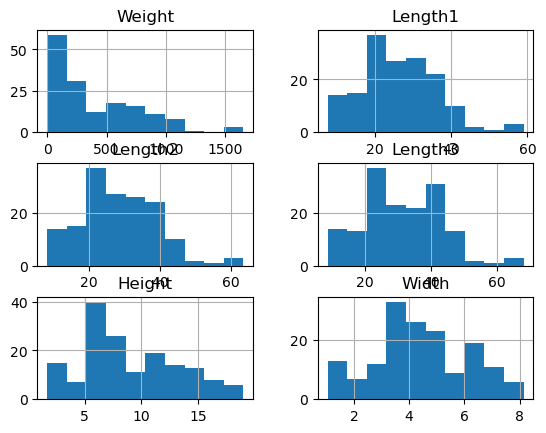

In [8]:
# import seaborn
import seaborn as sns
df.hist()

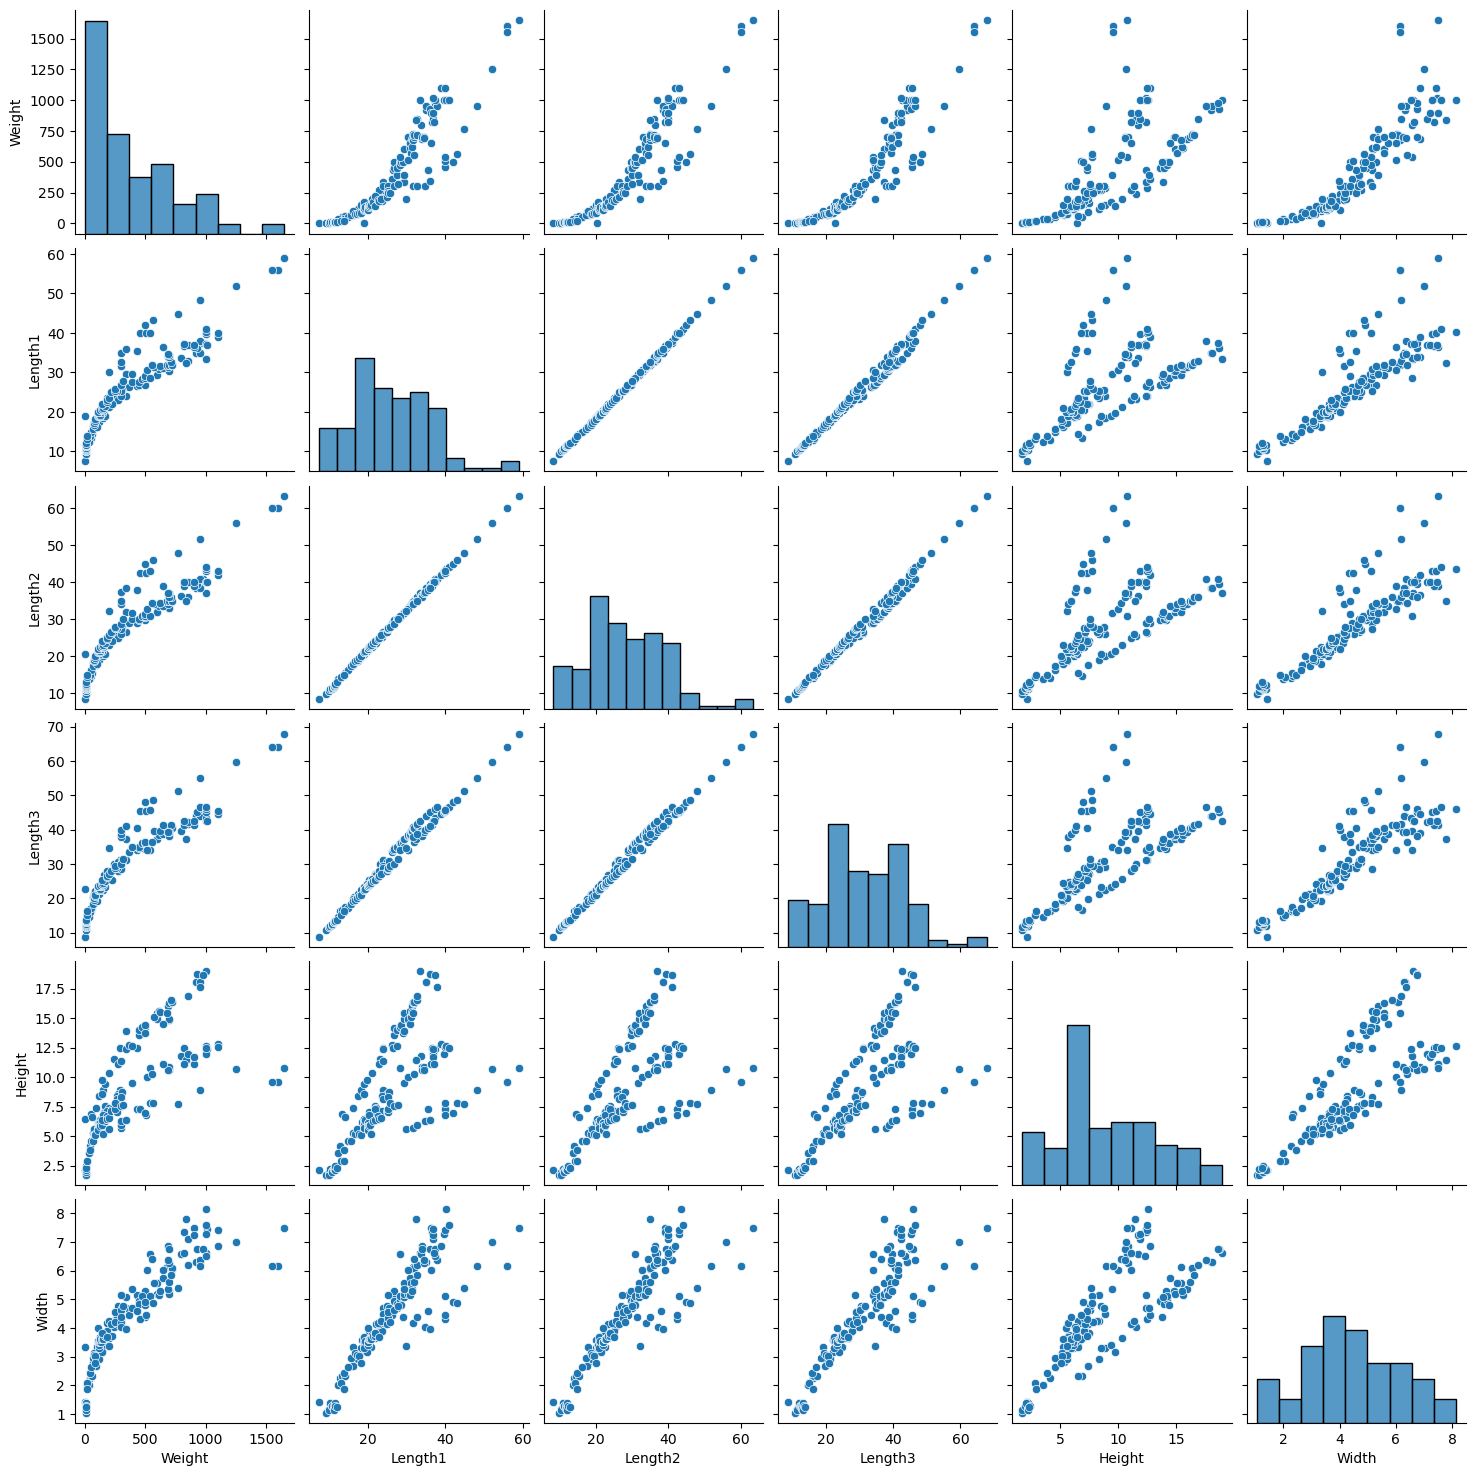

In [9]:
# Ignore warnings during plotting
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df)
# Create a pair plot of the variables in the DataFrame

In [10]:
y = df["Weight"]
# Create the target variable y

In [11]:
y.shape

(159,)

In [12]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [13]:
species_counts = df['Species'].value_counts()
species_counts

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

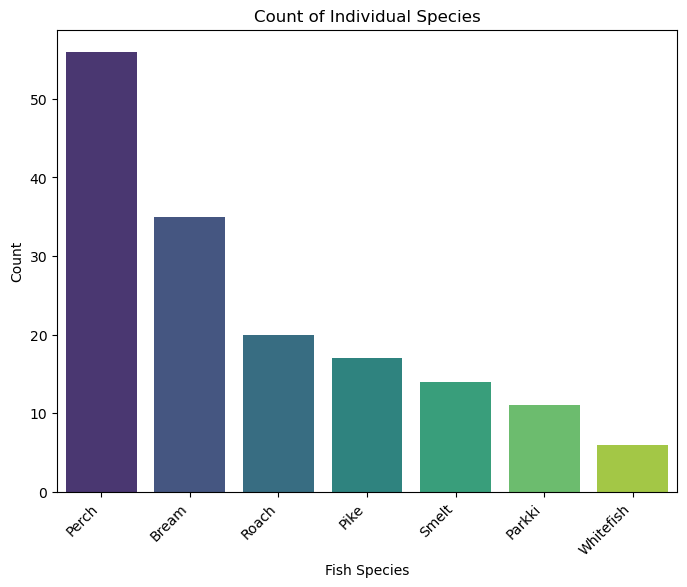

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but it enhances the aesthetics of the plot

# Assuming fish_dataset is your DataFrame
# Replace 'Species' with the actual column name in your dataset
species_counts = df['Species'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="viridis")
plt.title('Count of Individual Species')
plt.xlabel('Fish Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


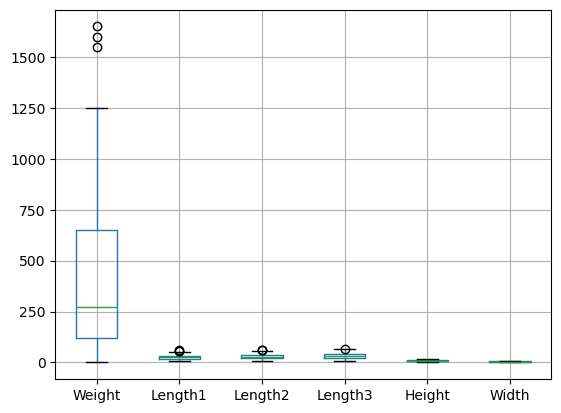

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Weight' is the numeric column for which you want to create a box plot
# Replace 'Weight' with the actual column name in your dataset
# Create a box plot

df.boxplot()
plt.show()


In [16]:
for x in df.columns[::]:              
    if df[x].dtype == object:
        continue
    else:
        q1 = df[x].quantile(q=0.25)
        q3 = df[x].quantile(q=0.75)
        IQR = q3-q1
        
        low = q1-1.5 *(IQR)
        high = q3+1.5*(IQR)
        ## dealing your outliers
        df.loc[(df[x]<low)| (df[x]>high)]= df[x].median()

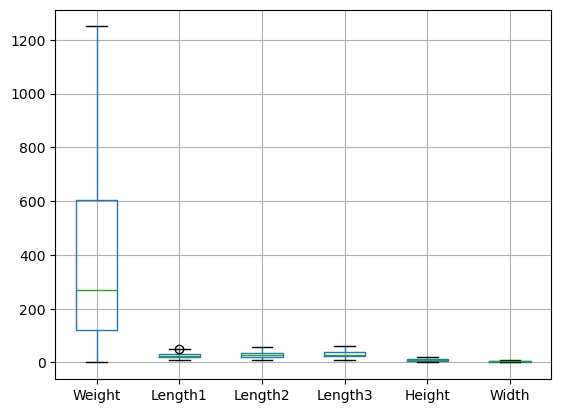

In [17]:
df.boxplot()
plt.show()

In [18]:
# Drop 'Species' in place
df.drop('Species', axis=1,)


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [20]:
from sklearn.metrics import r2_score

x = df[['Length1', 'Length2', 'Length3', 'Height']].values
y = df['Weight'].values


# Select features for X (assuming X is a subset of columns in df)
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Instantiate the Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = LR.predict(X_train)

# Make predictions on the test set
y_test_pred = LR.predict(X_test)

# Calculating R-squared scores for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print('R2_train= ', train_r2, '\nR2_test= ', test_r2)

R2_train=  0.8982191624292017 
R2_test=  0.8871747054371791


In [27]:
x = df[['Length1', 'Length2', 'Length3', 'Height']].values
y = df['Weight'].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Create a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = LR.predict(X_train)

# Making predictions on the test set
y_test_pred = LR.predict(X_test)

# Evaluating the model using mean squared error
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the mean squared error for training and test sets
print('MSE_train= ', train_mse, '\nMSE_test= ', test_mse)


R2_train=  9866.986161905641 
R2_test=  13762.398999904206


In [22]:
# Extracting the 'Height' feature and 'Weight' target variable
x = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values

# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Creating a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = LR.predict(X_train)

# Making predictions on the test set
y_test_pred = LR.predict(X_test)

# Evaluating the model using R-squared score
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the R-squared scores for training and test sets
print('R2_train= ', train_r2, '\nR2_test= ', test_r2)

R2_train=  0.6627617492887903 
R2_test=  0.5428567126280801


In [23]:
# Extracting the 'Length3' feature and 'Weight' target variable
x = df['Length3'].values.reshape(-1, 1)
y = df['Weight'].values

# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Create a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = LR.predict(X_train)

# Making predictions on the test set
y_test_pred = LR.predict(X_test)

# Evaluating the model using R-squared score
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the R-squared scores for training and test sets
print('R2_train= ', train_r2, '\nR2_test= ', test_r2)


R2_train=  0.8184884558084639 
R2_test=  0.811068525587292


In [33]:
# Extracting the 'Width' feature and 'Weight' target variable
x = df['Width'].values.reshape(-1, 1)
y = df['Weight'].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Creating a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = LR.predict(X_train)

# Making predictions on the test set
y_test_pred = LR.predict(X_test)

# Evaluating the model using R-squared score
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the R-squared scores for training and test sets
print('R2_train= ', train_r2, '\nR2_test= ', test_r2)

R2_train=  0.7166337768689214 
R2_test=  0.6233334326283801


In [51]:
# Extracting the 'Weight' feature and set it as both the independent and dependent variable
x = df['Weight'].values.reshape(-1, 1)
y = df['Weight'].values

# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Creating a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = LR.predict(X_train)

# Making predictions on the test set
y_test_pred = LR.predict(X_test)

# Evaluating the model using R-squared score
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the R-squared scores for training and test sets
print('R2_train= ', train_r2, '\nR2_test= ', test_r2)

R2_train=  1.0 
R2_test=  1.0


In [72]:
# Extracting features and target variable
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = df['Weight'].values

# Standardazing the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

# Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)

# Creating a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# Making  predictions on the test and training sets
Reg_predict = reg.predict(X_test)
Reg_pred_train = reg.predict(X_train)

# Evaluating the model using R-squared scores
from sklearn import metrics
print("R score Test", metrics.r2_score(y_test, Reg_predict))
print("R score Train", metrics.r2_score(y_train, Reg_pred_train))


R score Test 0.886034333692951
R score Train 0.8987258939782927


In [62]:
from sklearn.linear_model import Ridge

# Creating a Ridge regression model
ridge_reg = Ridge()

# Fit the Ridge model to the training data
ridge_reg.fit(X_train, y_train)


Ridge()

In [63]:
ridge_reg.score(X_test,y_test)

0.8849392433828039

In [64]:
ridge_reg.score(X_train,y_train)

0.8908417287879348

In [65]:
from sklearn.linear_model import Lasso

# Creating a Lasso regression model
lasso_reg = Lasso()

# Fit the Lasso model to the training data
lasso_reg.fit(X_train, y_train)

# Making predictions on the training set
y_pred_lasso_train = lasso_reg.predict(X_train)

# Making predictions on the test set
y_pred_lasso_test = lasso_reg.predict(X_test)


In [66]:
lasso_reg.score(X_test,y_test)

0.8849220598487858

In [73]:
lasso_reg.score(X_train,y_train)

0.8892407277537475